In [1]:
#analysing popularity of genres
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('googleplaystore.csv')

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Cleaning the Data

In [3]:
df.drop(['Current Ver'], axis = 1, inplace=True)
df.drop(['Android Ver'], axis = 1, inplace=True)

In [4]:
print(df.Category.unique())
print(df.loc[df['Category'] == '1.9'])
df = df.drop(df.index[[10472]])

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated  
10472       1.0.19  


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [6]:
df.Rating.fillna(0, inplace=True)

In [7]:
df[df['Type'].isnull()].index.tolist()
df = df.drop(df.index[[9148]])

In [8]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


# Category-wise Distribution

In [9]:
categories = df.Category.unique().tolist()
catcount = df['Category'].value_counts().tolist()

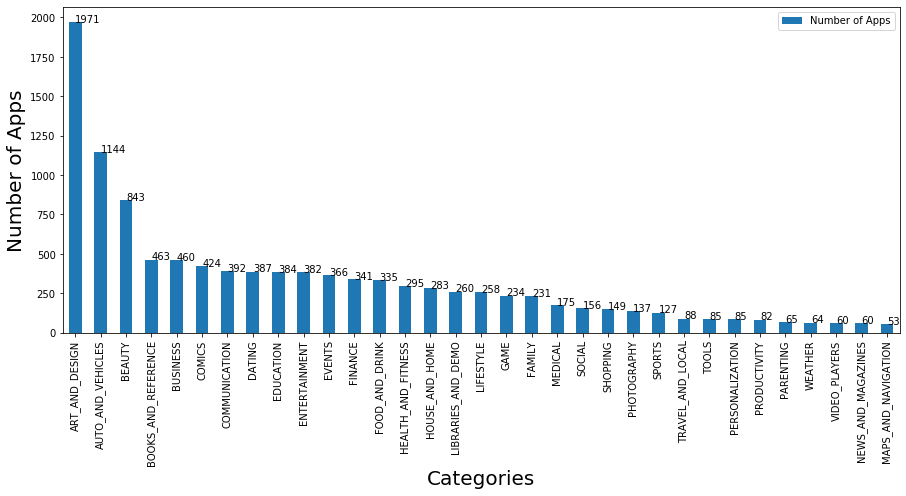

In [10]:
cdf = pd.DataFrame({'Categories':categories, 'Number of Apps':catcount})
ax = cdf.plot(x='Categories', y='Number of Apps', kind="bar", figsize=(15,6), rot=90, fontsize=10)
ax.set_xlabel("Categories", fontsize=20)
ax.set_ylabel("Number of Apps", fontsize=20)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

# Genre-wise Distribution

In [11]:
#extract individual genres
genres = []
for i in df['Genres']:
    temp=[]
    temp=i.split(';')
    for y in temp:
        if(y not in genres):
            genres.append(y)
#genres which appear multiple times
multipleGenres = []
sameMultipleGenres = []
for i in df['Genres']:
    if ';' in i:
        multipleGenres.append(i)
#same multiple genres  
import itertools
for i in multipleGenres:
    t=[]
    t = i.split(';')
    for a, b in itertools.combinations(t, 2):
        if a == b:
            multipleGenres.remove(i)
            sameMultipleGenres.append(i)
print(sameMultipleGenres)

['Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education', 'Education;Education']


In [12]:
df['Genres'].replace('Education;Education', 'Education', inplace = True)

In [13]:
#cleaning the Installs column
import re
#remove + sign
regex_pat = re.compile(r'\+')
df['Installs'] = df['Installs'].str.replace(regex_pat, '')
#remove ','
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].astype(int)

In [14]:
genredf = pd.DataFrame({'Installs':df['Installs'], 'Rating':df['Rating'], 'Genre':df['Genres']})
genredf.head()

,Installs,Rating,Genre
0,10000,4.1,Art & Design
1,500000,3.9,Art & Design;Pretend Play
2,5000000,4.7,Art & Design
3,50000000,4.5,Art & Design
4,100000,4.3,Art & Design;Creativity


In [15]:
#distinguishing movies based on genre
genres = []
genreList = []
for i in df['Genres']:
    temp=[]
    temp=i.split(';')
    for y in temp:
        a = y.replace('&', '').replace(' ', '').lower()
        if(y not in genres):
            genres.append(y)
            genreList.append(a)
#creating genre lists of apps
genreDict = {}
for i in genres:
    genreDict[i] = genredf['Genre'].str.contains(i)
genreDfDict = {}
for i in genres:
    genreDfDict[i] = genredf[genreDict[i]]
for key,value in genreDfDict.items():
    print(key)

Art & Design
Pretend Play
Creativity
Action & Adventure
Auto & Vehicles
Beauty
Books & Reference
Business
Comics
Communication
Dating
Education
Music & Video
Brain Games
Entertainment
Events
Finance
Food & Drink
Health & Fitness
House & Home
Libraries & Demo
Lifestyle
Adventure
Arcade
Casual
Card
Action
Strategy
Puzzle
Sports
Music
Word
Racing
Simulation
Board
Trivia
Role Playing
Educational
Music & Audio
Video Players & Editors
Medical
Social
Shopping
Photography
Travel & Local
Tools
Personalization
Productivity
Parenting
Weather
News & Magazines
Maps & Navigation
Casino


In [16]:
genreLengths = []
for key in genres:
    length = len(genreDfDict[key].index)
    genreLengths.append(length)
pdf = pd.DataFrame(genres, columns=['Genres'])
pdf['Length'] = genreLengths
pdf.head()

,Genres,Length
0,Art & Design,69
1,Pretend Play,90
2,Creativity,37
3,Action & Adventure,138
4,Auto & Vehicles,85


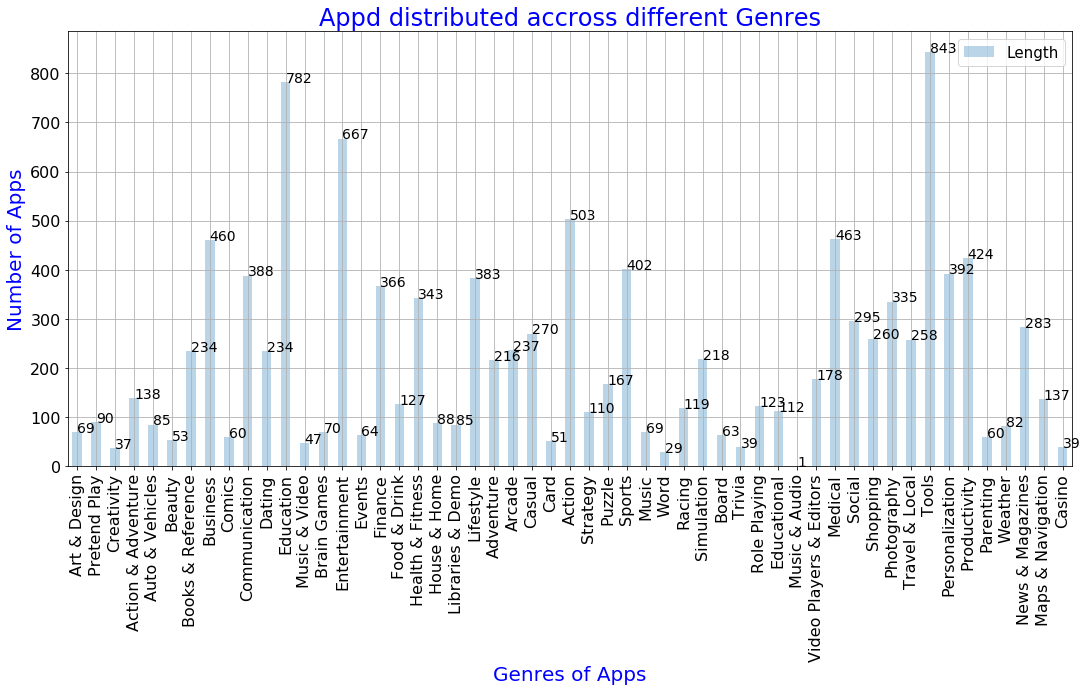

In [17]:
fig, ax = plt.subplots()
pdf.plot.bar(x = 'Genres', y = 'Length',figsize=(18,8), rot = 90, fontsize=16, ax = ax, alpha=0.3)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), fontsize=14)
plt.title('Appd distributed accross different Genres', fontsize=24, color='blue')
plt.xlabel('Genres of Apps', fontsize=20, color='blue')
plt.ylabel('Number of Apps', fontsize=20, color='blue')
plt.legend(fontsize=15)
plt.grid(True)

# Free vs Paid App Analysis

In [18]:
tdf = pd.DataFrame({'Category':df['Category'], 'Type':df['Type']})
tdf.head()

,Category,Type
0,ART_AND_DESIGN,Free
1,ART_AND_DESIGN,Free
2,ART_AND_DESIGN,Free
3,ART_AND_DESIGN,Free
4,ART_AND_DESIGN,Free


In [20]:
types = pd.get_dummies(tdf.Type)
types.head()
types.join(tdf)

,Free,Paid,Category,Type
0,1,0,ART_AND_DESIGN,Free
1,1,0,ART_AND_DESIGN,Free
2,1,0,ART_AND_DESIGN,Free
3,1,0,ART_AND_DESIGN,Free
4,1,0,ART_AND_DESIGN,Free
...,...,...,...,...
10836,1,0,FAMILY,Free
10837,1,0,FAMILY,Free
10838,1,0,MEDICAL,Free
10839,1,0,BOOKS_AND_REFERENCE,Free


In [21]:
tdf.drop(['Type'], axis=1, inplace=True) 

In [22]:
#count free and pais apps
paid=[]
free=[]
for i in categories:
    #c gives the count of Paid and Free Apps in i
    c = df.loc[df['Category'] == i]['Type'].value_counts()
    #k is for extracting the keys of the returned object
    k = df.loc[df['Category'] == i]['Type'].value_counts().keys().tolist()
    if 'Free' in k and 'Paid' in k:
        free.append(c.Free)
        paid.append(c.Paid)
    elif 'Free' in k and 'Paid' not in k:
        free.append(c.Free)
        paid.append(0)
    elif 'Free' not in k and 'Paid' in k:
        free.append(0)
        paid.append(c.Paid)

In [23]:
bdf = pd.DataFrame(categories, columns=['Category'])

In [25]:
bdf['Free']=free
bdf['Paid']=paid
bdf.head()

,Category,Free,Paid
0,ART_AND_DESIGN,62,3
1,AUTO_AND_VEHICLES,82,3
2,BEAUTY,53,0
3,BOOKS_AND_REFERENCE,203,28
4,BUSINESS,446,14


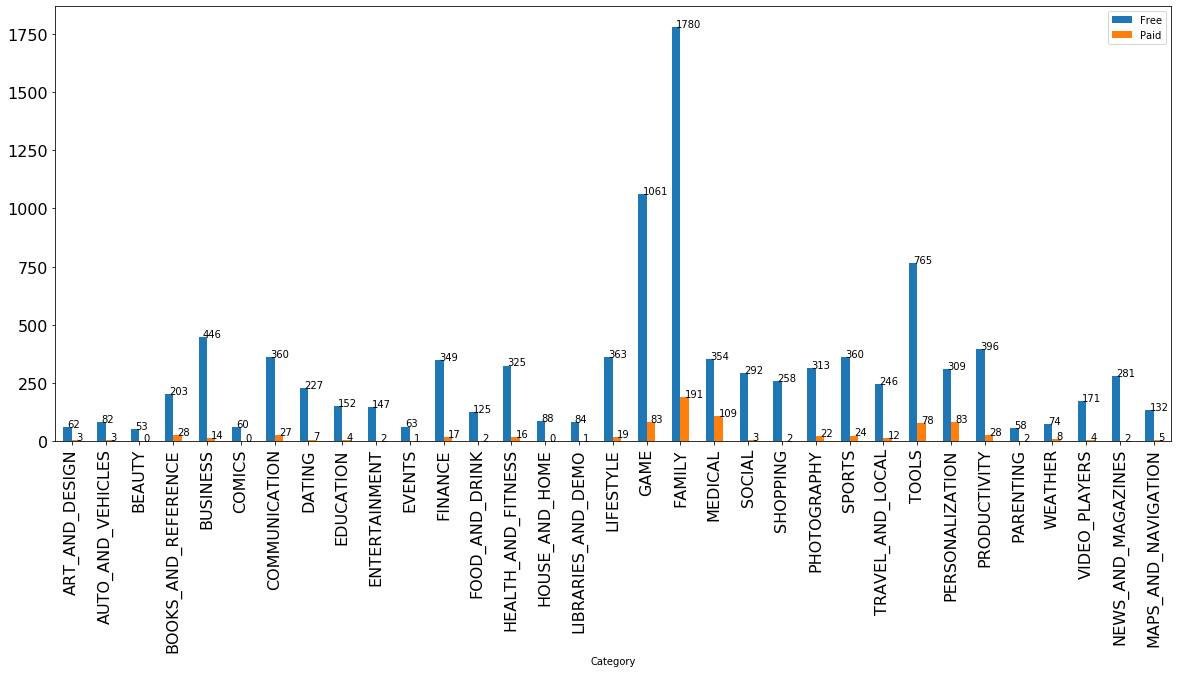

In [26]:
fig, ax = plt.subplots()
bdf.plot.bar(x = 'Category', y = ['Free', 'Paid'], rot = 90, figsize=(20,8), fontsize=16, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

# Sentiment Analysis of Reviews

In [27]:
df = pd.read_csv('googleplaystore_user_reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [28]:
apps = df.groupby(['App', 'Sentiment'])
apps.first()

Translated_Review  \
App                              Sentiment                                                      
10 Best Foods for You            Negative                  No recipe book Unable recipe book.   
                                 Neutral                                 Looking forward app,   
                                 Positive   I like eat delicious food. That's I'm cooking ...   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative                 Not bad, price little bit expensive   
                                 Neutral                                  Almost mobile phone   
...                                                                                       ...   
Hotwire Hotel & Car Rental App   Neutral                   The bait switch totally scandalous   
                                 Positive   Scam. Hotel prices shown first much lower fina...   
Housing-Real Estate & Property   Negative   Incorrect listings. The agents show property d...   
                                 Neutral    Why business? Your filters don't work.. redire...   
                                 Positive   It's waste app... Most properties 2017... And ...   

                                            Sentiment_Polarity  \
App                              Sentiment                       
10 Best Foods for You            Negative            -0.500000   
                                 Neutral              0.000000   
                                 Positive             1.000000   
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative            -0.112500   
                                 Neutral              0.000000   
...                                                        ...   
Hotwire Hotel & Car Rental App   Neutral              0.000000   
                                 Positive             0.183929   
Housing-Real Estate & Property   Negative            -0.025000   
                                 Neutral              0.000000   
                                 Positive             0.266667   

                                            Sentiment_Subjectivity  
App                              Sentiment                          
10 Best Foods for You            Negative                 0.500000  
                                 Neutral                  0.000000  
                                 Positive                 0.533333  
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室 Negative                 0.622222  
                                 Neutral                  0.000000  
...                                                            ...  
Hotwire Hotel & Car Rental App   Neutral                  0.750000  
                                 Positive                 0.517262  
Housing-Real Estate & Property   Negative                 0.125000  
                                 Neutral                  0.000000  
                                 Positive                 0.375000  

[2376 rows x 3 columns]

In [29]:
#fill NaN values with Neutral
df['Sentiment'].isnull().sum()
df['Sentiment'].fillna('Neutral', inplace=True)
df['Translated_Review'].isnull().sum()
df['Translated_Review'].fillna('No review', inplace=True)

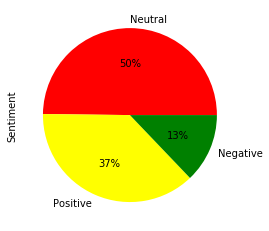

In [30]:
#plot the values
df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [32]:
#feature extraction
features = df.iloc[:, 1].values
labels = df.iloc[:, 2].values
import re
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [34]:
processed_features

['i like eat delicious food that i cooking food myself case 10 best foods helps lot also best before shelf life ',
 'this help eating healthy exercise regular basis',
 'no review',
 'works great especially going grocery store',
 'best idea us',
 'best way',
 'amazing',
 'no review',
 'looking forward app ',
 'it helpful site it help foods get ',
 'good you ',
 'useful information the amount spelling errors questions validity information shared once fixed 5 stars given ',
 'thank you great app add arthritis eyes immunity kidney liver detox foods please ',
 'greatest ever completely awesome maintain health this must ppl there love it ',
 'good health good health first priority ',
 'no review',
 'health it important world either life think ',
 'mrs sunita bhati thankful developers to make kind app really good healthy food body',
 'very useful in diabetes age 30 need control sugar thanks',
 'one greatest apps ',
 'good nice',
 'healthy really helped',
 'god health',
 'health should always 

In [35]:
#tf-idf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer (max_features=5000, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruchika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
#split the datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [40]:
#train the classifier
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [41]:
#make predictions on the dataset
predictions = text_classifier.predict(x_test)

In [42]:
#calculate metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1116   45  517]
 [  11 6287  150]
 [  37   77 4619]]
              precision    recall  f1-score   support

    Negative       0.96      0.67      0.79      1678
     Neutral       0.98      0.98      0.98      6448
    Positive       0.87      0.98      0.92      4733

    accuracy                           0.93     12859
   macro avg       0.94      0.87      0.90     12859
weighted avg       0.94      0.93      0.93     12859

0.9349094019752703
